Kaitlyn Coons 12 March 2023 

# The Healthcare System: A Comparative Analysis #

## Introduction ##

**The Project**

This project is based on the Hospital Dataset from the [The Collection of Really Great, Interesting, Situated Datasets (CORGIS)](https://corgis-edu.github.io/corgis/csv/hospitals/). The dataset includes information on the names, locations, average ratings, mortality rates, and average procedure costs, among other variables.


To better understand the varying experiences with healthcare across the Unites States, this project compares the quality and cost of medical procedures of hospitals in California and Wyoming. While they may appear to be a random pairing of states, California and Wyoming were chosen because of their designation as the most populous (CA) and least populous (WY) states.

**Context and Motivation**

Access to healthcare in the United States is not a new issue, but it has been recently stressed by the COVID-19 pandemic. As asserted by the [National Library of Medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3540621/), there are significant disparities in access to healthcare based on race and ethnicity. Drawing on the CORGIS dataset, this project seeks to discover if other barriers to heathcare exist such as price and quality of medical attention. 

I do not have prior experience working with healthcare data, nor am I particularly interested in the world of medicine. That said, the past few years of living through the COVID-19 pandemic have sparked my interest in uncovering the disparities felt within the healthcare system.


**Key Terms**

The dataset divides U.S. hospitals into three categories: government, private, and proprietary. Government hospitals are those –as the name suggest– that are owned and funded by the government. They are public entities and operate off of money collected for taxes. Private hospitals are not affiliated with the government, instead run by corporations. They can be book non-profit and for-profit. Lastly, proprietary hospitals are for-profit institutions also run by individual corporations or specific government entities.


**Preliminary Research Questions**
1. Is there a correlation between medical costs and the quality of treatment?


2. Does the type of hospital (government, private, or proprietary) impact medical costs and the quality of treatment?

**Data Exploration**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
hospital_df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/hospitals/hospitals.csv')
hospital_df

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,...,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,...,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,Same,None,Above,None,Same,...,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,Providence Hospital Of North Houston Llc,Houston,TX,Proprietary,-1,None,None,None,None,None,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown
4768,The Hospitals Of Providence Transmountain Campus,El Paso,TX,Proprietary,-1,None,None,None,Same,Same,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown
4769,Saint Camillus Medical Center,Hurst,TX,Proprietary,-1,None,None,None,None,None,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown
4770,Houston Methodist The Woodlands Hospital,The Woodlands,TX,Private,3,None,Same,None,Above,Same,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown


In [4]:
hospital_df.describe()

,Rating.Overall,Procedure.Heart Attack.Cost,Procedure.Heart Failure.Cost,Procedure.Pneumonia.Cost,Procedure.Hip Knee.Cost
count,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000
mean,2.179380,11360.977997,12149.034367,14625.655071,12501.068525
std,1.935582,11988.404171,7502.579223,6598.128266,10997.181810
min,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,15169.500000,0.000000
50%,3.000000,0.000000,15921.500000,16933.500000,19120.000000
75%,4.000000,23764.250000,17126.500000,18245.000000,21985.500000
max,5.000000,29670.000000,22450.000000,27126.000000,42546.000000


In [5]:
hospital_df.sample()

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
4007,Memorial Hospital,Gonzales,TX,Government,4,None,None,Same,Above,Same,...,Unknown,15875,Average,Average,16968,Average,Average,0,Unknown,Unknown


It is interesting that the mortality rating, safety rating, readmission rating, and experience rating are based on a comparison to the national averages. While on one hand this limits the credibility of the dataset because the raw numbers are not presented, as it forces the viewer to rely on the creator's analysis, it also streamlines the dataset. The viewer learns much more about a hospital by reading that it is "Above" the national rating for safety than they would from reading over the equivalent numerical value.

In [6]:
hospital_df.columns

Index(['Facility.Name', 'Facility.City', 'Facility.State', 'Facility.Type',
       'Rating.Overall', 'Rating.Mortality', 'Rating.Safety',
       'Rating.Readmission', 'Rating.Experience', 'Rating.Effectiveness',
       'Rating.Timeliness', 'Rating.Imaging', 'Procedure.Heart Attack.Cost',
       'Procedure.Heart Attack.Quality', 'Procedure.Heart Attack.Value',
       'Procedure.Heart Failure.Cost', 'Procedure.Heart Failure.Quality',
       'Procedure.Heart Failure.Value', 'Procedure.Pneumonia.Cost',
       'Procedure.Pneumonia.Quality', 'Procedure.Pneumonia.Value',
       'Procedure.Hip Knee.Cost', 'Procedure.Hip Knee.Quality',
       'Procedure.Hip Knee.Value'],
      dtype='object')

In [7]:
hospital_df.describe(include='all')

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
count,4772,4772,4772,4772,4772.000000,4772,4772,4772,4772,4772,...,4772,4772.000000,4772,4772,4772.000000,4772,4772,4772.000000,4772,4772
unique,4589,2929,56,5,NaN,4,4,4,4,4,...,4,NaN,4,4,NaN,4,4,NaN,4,4
top,Memorial Hospital,Chicago,TX,Private,NaN,Same,None,Above,None,Same,...,Unknown,NaN,Average,Average,NaN,Average,Average,NaN,Average,Unknown
freq,15,29,403,2078,NaN,2663,2142,1508,1340,3372,...,2506,NaN,3141,2522,NaN,3555,2338,NaN,2615,2045
mean,NaN,NaN,NaN,NaN,2.179380,NaN,NaN,NaN,NaN,NaN,...,NaN,12149.034367,NaN,NaN,14625.655071,NaN,NaN,12501.068525,NaN,NaN
std,NaN,NaN,NaN,NaN,1.935582,NaN,NaN,NaN,NaN,NaN,...,NaN,7502.579223,NaN,NaN,6598.128266,NaN,NaN,10997.181810,NaN,NaN
min,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,15169.500000,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,15921.500000,NaN,NaN,16933.500000,NaN,NaN,19120.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,17126.500000,NaN,NaN,18245.000000,NaN,NaN,21985.500000,NaN,NaN


While it is interesting to view a statistical representation of all hospitals across the U.S., it is difficult to make meaningful conclusions with so many entries. Moreover, analyzing individual states will allow the project to conclude whether the quality and cost of healthcare differs across the U.S.

In [8]:
#extracting data for California
CAdf = hospital_df.loc[ hospital_df['Facility.State'] == 'CA' ]
CAdf.sample()

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
553,College Medical Center,Long Beach,CA,Proprietary,3,None,Above,Below,None,Same,...,Unknown,17321,Unknown,Unknown,22113,Average,Higher,0,Unknown,Unknown


In [9]:
CAdf.describe()

,Rating.Overall,Procedure.Heart Attack.Cost,Procedure.Heart Failure.Cost,Procedure.Pneumonia.Cost,Procedure.Hip Knee.Cost
count,340.000000,340.000000,340.000000,340.000000,340.000000
mean,2.364706,14079.597059,12567.961765,15012.900000,12629.926471
std,1.633694,12074.532434,7660.121412,7382.317522,10915.032397
min,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,15549.000000,0.000000
50%,3.000000,22592.500000,16495.500000,17407.000000,19025.000000
75%,3.000000,24561.500000,17655.250000,19089.250000,21639.750000
max,5.000000,29606.000000,21799.000000,26819.000000,30424.000000


In [10]:
#extracting data for Wyoming
WYdf = hospital_df.loc[ hospital_df['Facility.State'] == 'WY' ]
WYdf.sample()

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
4680,Cheyenne Regional Medical Center,Cheyenne,WY,Unknown,3,Same,Below,Same,Below,Same,...,Average,15548,Average,Average,17293,Average,Average,20529,Average,Lower


In [11]:
WYdf.describe()

,Rating.Overall,Procedure.Heart Attack.Cost,Procedure.Heart Failure.Cost,Procedure.Pneumonia.Cost,Procedure.Hip Knee.Cost
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,1.785714,3348.392857,10061.607143,10966.285714,10324.821429
std,2.200289,8366.675013,7703.980675,7181.859719,10601.491960
min,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,14711.000000,14957.000000,9077.000000
75%,3.250000,0.000000,15902.750000,15693.000000,20280.750000
max,5.000000,24962.000000,18649.000000,18352.000000,23892.000000


A cursory glance at the mean cost of a heart attack procedure indicates drastic differences in the pricing of medical procedures between the states. While the mean cost in California is roughly 14079.60 (14079.597059), the mean cost in Wyoming is roughly 3348.39 (3348.392857) U.S. dollars.		

US Government hospitals = (1064, 24)
US Private hospitals = (2078, 24)
US Proprietary hospitals = (796, 24)


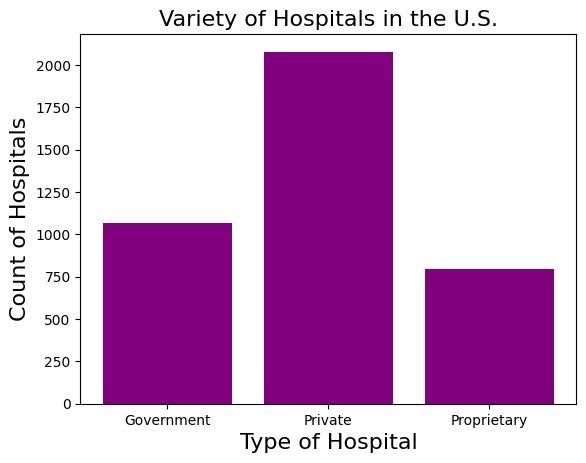

CA Government hospitals = (64, 24)
CA Private hospitals = (105, 24)
CA Proprietary hospitals = (76, 24)


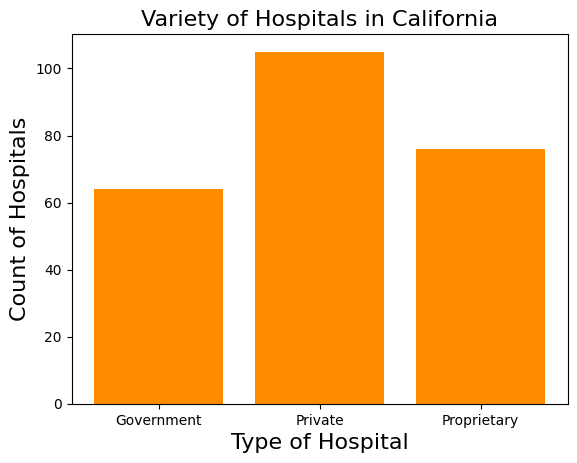

WY Government hospitals = (21, 24)
WY Private hospitals = (1, 24)
WY Proprietary hospitals = (4, 24)


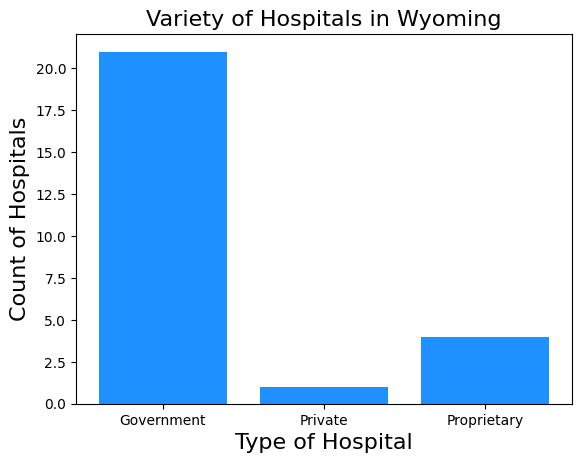

In [12]:
#number of Government hospitals in the U.S.
UStypeGt = hospital_df.loc[ hospital_df['Facility.Type'] == 'Government' ]
UStypeGt.shape

#number of Private hospitals in the U.S.
UStypePri = hospital_df.loc[ hospital_df['Facility.Type'] == 'Private' ]
UStypePri.shape

#number of Proprietary in the U.S.
UStypePro = hospital_df.loc[ hospital_df['Facility.Type'] == 'Proprietary' ]
UStypePro.shape

print('US Government hospitals =', UStypeGt.shape) 
print('US Private hospitals =' ,UStypePri.shape) 
print('US Proprietary hospitals =', UStypePro.shape)

USx = ('Government', 'Private', 'Proprietary')
USy = (1064, 2078, 796)

plt.bar(USx, USy, color = 'purple')
plt.xlabel("Type of Hospital", size=16)
plt.ylabel("Count of Hospitals",size=16)
plt.title("Variety of Hospitals in the U.S.",size=16)
plt.show()

#number of Government hospitals in CA
CAtypeGt = CAdf.loc[ CAdf['Facility.Type'] == 'Government' ]
CAtypeGt.shape

#number of Private hospitals in CA
CAtypePri = CAdf.loc[ CAdf['Facility.Type'] == 'Private' ]
CAtypePri.shape

#number of Proprietary in CA
CAtypePro = CAdf.loc[ CAdf['Facility.Type'] == 'Proprietary' ]
CAtypePro.shape

print('CA Government hospitals =', CAtypeGt.shape) 
print('CA Private hospitals =' ,CAtypePri.shape) 
print('CA Proprietary hospitals =', CAtypePro.shape)

CAx = ('Government', 'Private', 'Proprietary')
CAy = (64, 105, 76)

plt.bar(CAx, CAy, color = 'darkorange')
plt.xlabel("Type of Hospital", size=16)
plt.ylabel("Count of Hospitals",size=16)
plt.title("Variety of Hospitals in California",size=16)
plt.show()

#number of Government hospitals in WY
WYtypeGt = WYdf.loc[ WYdf['Facility.Type'] == 'Government' ]
WYtypeGt.shape

#number of Private hospitals in WY
WYtypePri = WYdf.loc[ WYdf['Facility.Type'] == 'Private' ]
WYtypePri.shape

#number of Proprietary in WY
WYtypePro = WYdf.loc[ WYdf['Facility.Type'] == 'Proprietary' ]
WYtypePro.shape

print('WY Government hospitals =', WYtypeGt.shape) 
print('WY Private hospitals =' ,WYtypePri.shape) 
print('WY Proprietary hospitals =', WYtypePro.shape)

WYx = ('Government', 'Private', 'Proprietary')
WYy = (21, 1, 4)

plt.bar(WYx, WYy, color = 'dodgerblue')
plt.xlabel("Type of Hospital", size=16)
plt.ylabel("Count of Hospitals",size=16)
plt.title("Variety of Hospitals in Wyoming",size=16)
plt.show()

While the distribution of California hospitals is roughly similar to the distribution of hospitals within the entire U.S., there is a notable lack of private hospitals within Wyoming.

All U.S. Hospital Ratings Mean:  2.179379715004191
All U.S. Hospital Ratings Median:  3.0
All U.S. Hospital Ratings Mode:  0    3
Name: Rating.Overall, dtype: int64


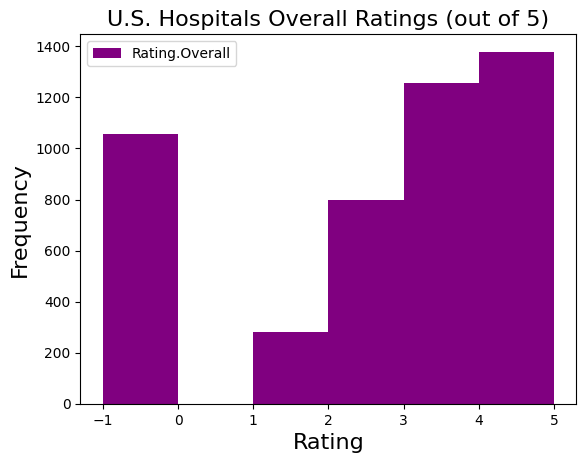

CA Hospital Ratings Mean:  2.364705882352941
CA Hospital Ratings Median:  3.0
CA Hospital Ratings Mode:  0    2
Name: Rating.Overall, dtype: int64


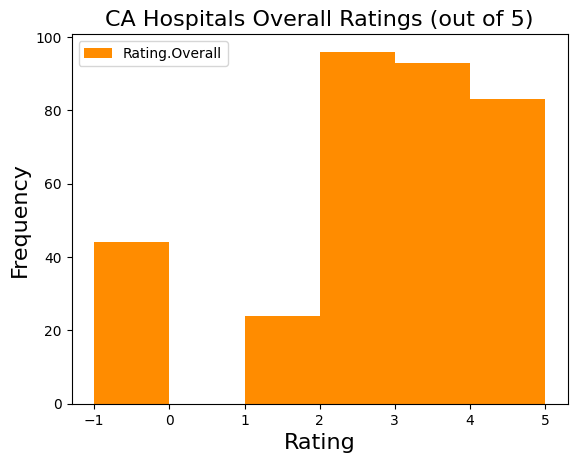

WY Hospital Ratings Mean:  1.7857142857142858
WY Hospital Ratings Median:  3.0
WY Hospital Ratings Mode:  0   -1
Name: Rating.Overall, dtype: int64


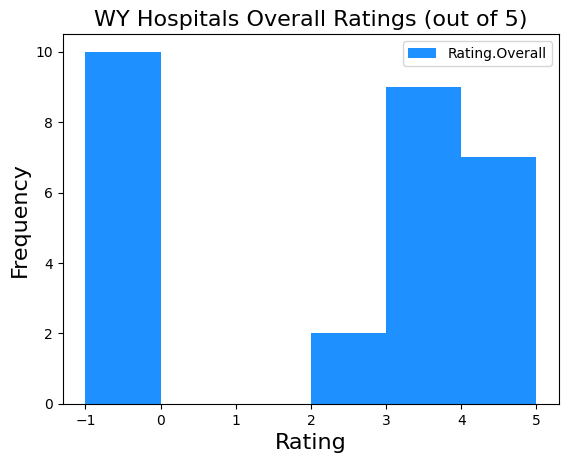

In [13]:
print('All U.S. Hospital Ratings Mean: ', hospital_df['Rating.Overall'].mean())
print('All U.S. Hospital Ratings Median: ',hospital_df['Rating.Overall'].median())
print('All U.S. Hospital Ratings Mode: ',hospital_df['Rating.Overall'].mode())
hospital_df.plot(y = 'Rating.Overall', kind = 'hist', bins = 6, color = 'purple')
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Rating',fontsize=16)
plt.title('U.S. Hospitals Overall Ratings (out of 5)',fontsize=16)
plt.show();

print('CA Hospital Ratings Mean: ',CAdf['Rating.Overall'].mean())
print('CA Hospital Ratings Median: ',CAdf['Rating.Overall'].median())
print('CA Hospital Ratings Mode: ',CAdf['Rating.Overall'].mode())
CAdf.plot(y = 'Rating.Overall', kind = 'hist', bins = 6, color = 'darkorange')
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Rating',fontsize=16)
plt.title('CA Hospitals Overall Ratings (out of 5)',fontsize=16)
plt.show();

print('WY Hospital Ratings Mean: ',WYdf['Rating.Overall'].mean())
print('WY Hospital Ratings Median: ',WYdf['Rating.Overall'].median())
print('WY Hospital Ratings Mode: ',WYdf['Rating.Overall'].mode())
WYdf.plot(y = 'Rating.Overall', kind = 'hist', bins = 6, color = 'dodgerblue')
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Rating',fontsize=16)
plt.title('WY Hospitals Overall Ratings (out of 5)',fontsize=16)
plt.show();

The "Rating.Overall" column of the dataset is scored on a scale from 1 to 5. However, -1 was used as a placeholder where entries were missing. Thus it will be necessary to remove these null entries to gain a more accurate picture of the data. (See final visualizations and results sections.)

CA Hospital Heart Attack Procedure Mean Cost:  14079.597058823529
CA Hospital Heart Attack Procedure Median Cost:  22592.5


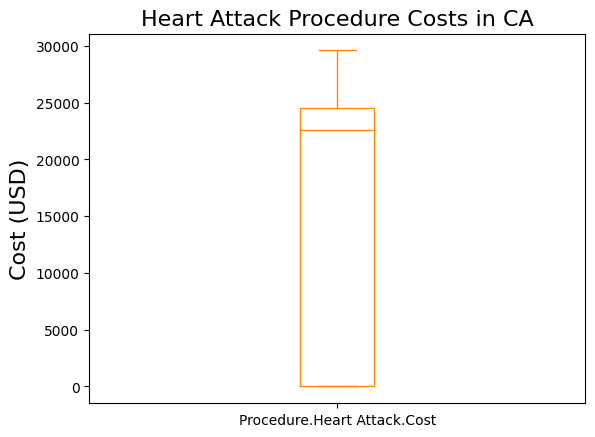

CA Hospital Heart Failure Procedure Mean Cost:  12567.961764705882
CA Hospital Heart Failure Procedure Median Cost:  16495.5


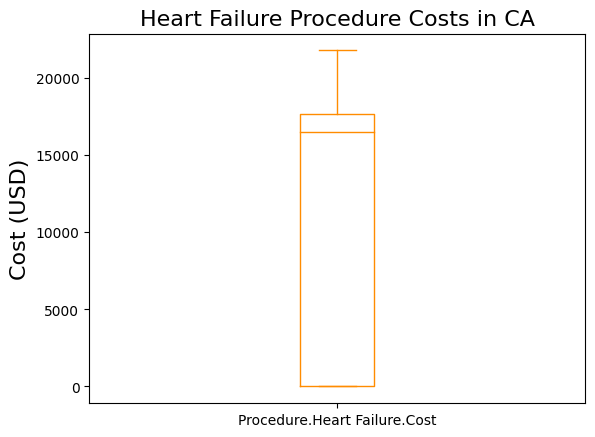

CA Hospital Pneumonia Procedure Mean Cost:  15012.9
CA Hospital Pneumonia Procedure Median Cost:  17407.0


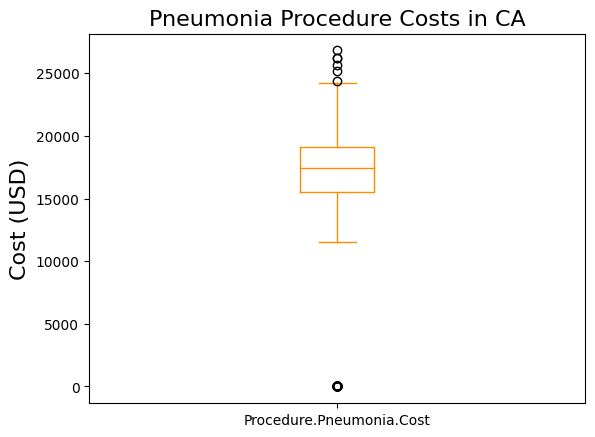

CA Hospital Hip and Knee Procedures Mean Cost:  12629.926470588236
CA Hospital Hip and Knee Procedures Median Cost:  19025.0


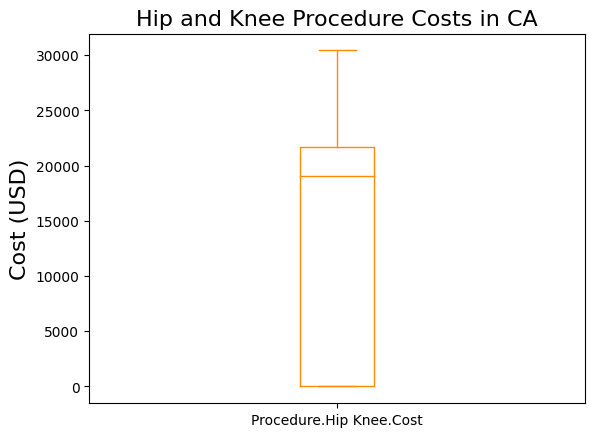

In [14]:
print('CA Hospital Heart Attack Procedure Mean Cost: ',CAdf['Procedure.Heart Attack.Cost'].mean())
print('CA Hospital Heart Attack Procedure Median Cost: ',CAdf['Procedure.Heart Attack.Cost'].median())
CAdf.plot(y = 'Procedure.Heart Attack.Cost', kind = 'box', color='darkorange')
plt.ylabel('Cost (USD)',fontsize=16)
plt.title('Heart Attack Procedure Costs in CA',fontsize=16)
plt.show();

print('CA Hospital Heart Failure Procedure Mean Cost: ',CAdf['Procedure.Heart Failure.Cost'].mean())
print('CA Hospital Heart Failure Procedure Median Cost: ',CAdf['Procedure.Heart Failure.Cost'].median())
CAdf.plot(y = 'Procedure.Heart Failure.Cost', kind = 'box',color='darkorange')
plt.ylabel('Cost (USD)',fontsize=16)
plt.title('Heart Failure Procedure Costs in CA',fontsize=16)
plt.show();

print('CA Hospital Pneumonia Procedure Mean Cost: ',CAdf['Procedure.Pneumonia.Cost'].mean())
print('CA Hospital Pneumonia Procedure Median Cost: ',CAdf['Procedure.Pneumonia.Cost'].median())
CAdf.plot(y = 'Procedure.Pneumonia.Cost', kind = 'box',color='darkorange')
plt.ylabel('Cost (USD)',fontsize=16)
plt.title('Pneumonia Procedure Costs in CA',fontsize=16)
plt.show();

print('CA Hospital Hip and Knee Procedures Mean Cost: ',CAdf['Procedure.Hip Knee.Cost'].mean())
print('CA Hospital Hip and Knee Procedures Median Cost: ',CAdf['Procedure.Hip Knee.Cost'].median())
CAdf.plot(y = 'Procedure.Hip Knee.Cost', kind = 'box',color='darkorange')
plt.ylabel('Cost (USD)',fontsize=16)
plt.title('Hip and Knee Procedure Costs in CA',fontsize=16)
plt.show();

WY Hospital Heart Attack Procedure Mean Cost:  3348.3928571428573
WY Hospital Heart Attack Procedure Median Cost:  0.0


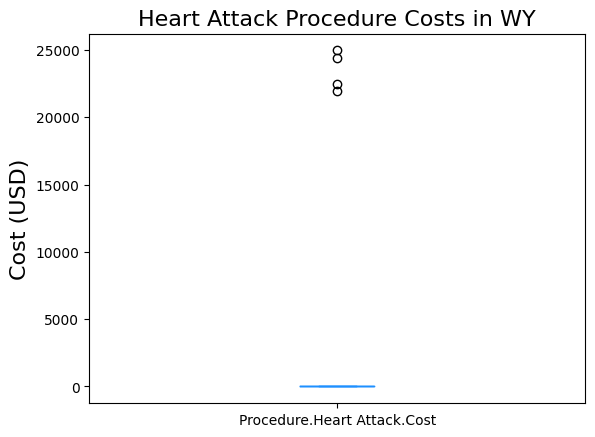

WY Hospital Heart Failure Procedure Mean Cost:  10061.607142857143
WY Hospital Heart Failure Procedure Median Cost:  14711.0


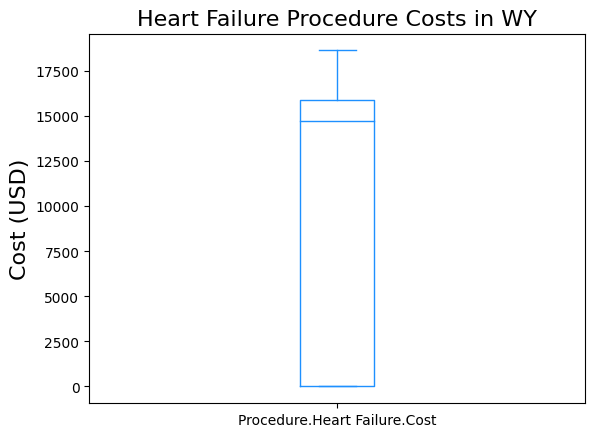

WY Hospital Pneumonia Procedure Mean Cost:  10966.285714285714
WY Hospital Pneumonia Procedure Median Cost:  14957.0


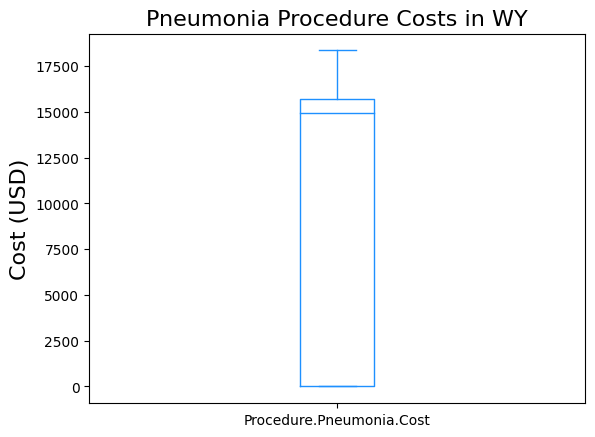

WY Hospital Hip and Knee Procedures Mean Cost:  10324.82142857143
WY Hospital Hip and Knee Procedures Median Cost:  9077.0


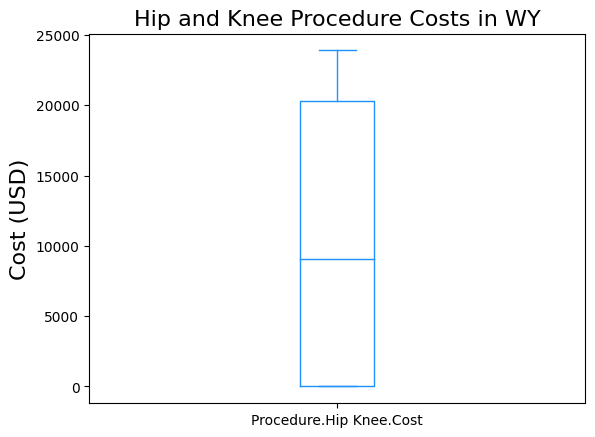

In [15]:
print('WY Hospital Heart Attack Procedure Mean Cost: ',WYdf['Procedure.Heart Attack.Cost'].mean())
print('WY Hospital Heart Attack Procedure Median Cost: ',WYdf['Procedure.Heart Attack.Cost'].median())
WYdf.plot(y = 'Procedure.Heart Attack.Cost', kind = 'box', color='dodgerblue')
plt.ylabel('Cost (USD)',fontsize=16)
plt.title('Heart Attack Procedure Costs in WY',fontsize=16)
plt.show();

print('WY Hospital Heart Failure Procedure Mean Cost: ',WYdf['Procedure.Heart Failure.Cost'].mean())
print('WY Hospital Heart Failure Procedure Median Cost: ',WYdf['Procedure.Heart Failure.Cost'].median())
WYdf.plot(y = 'Procedure.Heart Failure.Cost', kind = 'box',color='dodgerblue')
plt.ylabel('Cost (USD)',fontsize=16)
plt.title('Heart Failure Procedure Costs in WY',fontsize=16)
plt.show();

print('WY Hospital Pneumonia Procedure Mean Cost: ',WYdf['Procedure.Pneumonia.Cost'].mean())
print('WY Hospital Pneumonia Procedure Median Cost: ',WYdf['Procedure.Pneumonia.Cost'].median())
WYdf.plot(y = 'Procedure.Pneumonia.Cost', kind = 'box',color='dodgerblue')
plt.ylabel('Cost (USD)',fontsize=16)
plt.title('Pneumonia Procedure Costs in WY',fontsize=16)
plt.show();

print('WY Hospital Hip and Knee Procedures Mean Cost: ',WYdf['Procedure.Hip Knee.Cost'].mean())
print('WY Hospital Hip and Knee Procedures Median Cost: ',WYdf['Procedure.Hip Knee.Cost'].median())
WYdf.plot(y = 'Procedure.Hip Knee.Cost', kind = 'box',color='dodgerblue')
plt.ylabel('Cost (USD)',fontsize=16)
plt.title('Hip and Knee Procedure Costs in WY',fontsize=16)
plt.show();

There are very few records for heart attack procedure costs in Wyoming, resulting in a flat boxplot with just a few outliers.

CA hospitals below avg mortality = (23, 24)
CA hospitals same as avg mortality = (172, 24)
CA hospitals above avg mortality = (55, 24)


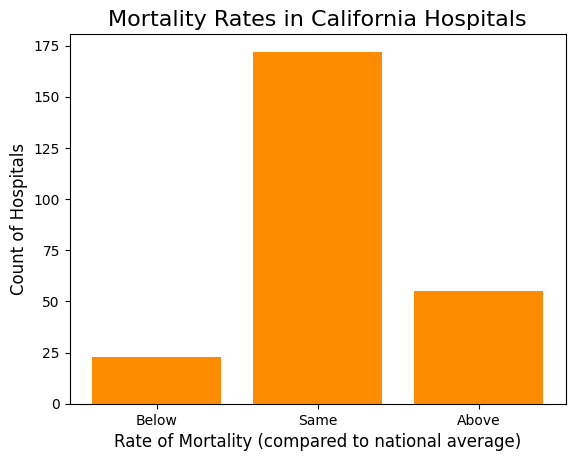

WY hospitals below avg mortality = (1, 24)
WY hospitals same as avg mortality = (17, 24)
WY hospitals above avg mortality = (0, 24)


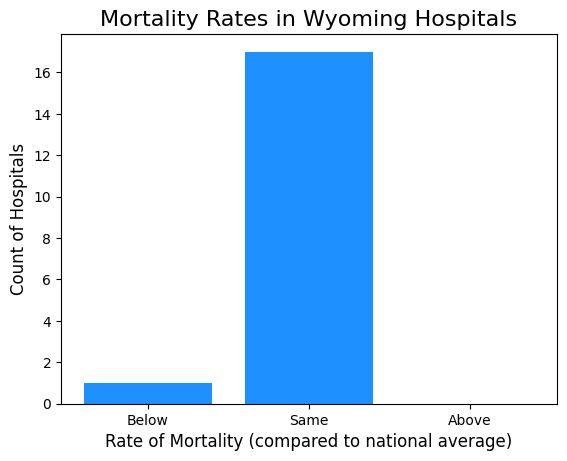

In [16]:
#extracting data for California mortality rates

#number of hospitals below the national mortality rate
CAmortb = CAdf.loc[ CAdf['Rating.Mortality'] == 'Below' ]
CAmortb.shape

#number of hospitals the same as the national mortality rate
CAmorts = CAdf.loc[ CAdf['Rating.Mortality'] == 'Same' ]
CAmorts.shape

#number of hospitals above the national mortality rate
CAmorta = CAdf.loc[ CAdf['Rating.Mortality'] == 'Above' ]
CAmorta.shape

print('CA hospitals below avg mortality =', CAmortb.shape) 
print('CA hospitals same as avg mortality =' ,CAmorts.shape) 
print('CA hospitals above avg mortality =', CAmorta.shape)

CAmx = ('Below', 'Same', 'Above')
CAmy = (23, 172, 55)

plt.bar(CAmx, CAmy, color = 'darkorange')
plt.xlabel("Rate of Mortality (compared to national average)", size=12)
plt.ylabel("Count of Hospitals",size=12)
plt.title("Mortality Rates in California Hospitals",size=16)
plt.show()

#extracting data for Wyoming mortality rates

#number of hospitals below the national mortality rate
WYmortb = WYdf.loc[ WYdf['Rating.Mortality'] == 'Below' ]
WYmortb.shape

#number of hospitals the same as the national mortality rate
WYmorts = WYdf.loc[ WYdf['Rating.Mortality'] == 'Same' ]
WYmorts.shape

#number of hospitals above the national mortality rate
WYmorta = WYdf.loc[ WYdf['Rating.Mortality'] == 'Above' ]
WYmorta.shape

print('WY hospitals below avg mortality =', WYmortb.shape) 
print('WY hospitals same as avg mortality =' ,WYmorts.shape) 
print('WY hospitals above avg mortality =', WYmorta.shape)

WYmx = ('Below', 'Same', 'Above')
WYmy = (1, 17, 0)

plt.bar(WYmx, WYmy, color = 'dodgerblue')
plt.xlabel("Rate of Mortality (compared to national average)", size=12)
plt.ylabel("Count of Hospitals",size=12)
plt.title("Mortality Rates in Wyoming Hospitals",size=16)
plt.show()

Both states have mortality rates that are mostly the same as the national average. The most important difference that is apparent in these bar charts is that California has roughly 50 hospitals that have mortality rates ABOVE the national average, whereas Wyoming has 0.

**Data Analysis**

Visualizations List:

1. hospital ratings with null records removed (below)
2. relationship between the rating and the Pneumonia procedure cost in CA Hospitals (below; I am planning to also add the other procedures)
3. cost comparisons (boxplots with corresponding CA and WY plots on the same graphs)
4. comparative boxplots of procedure costs divided by type of hospital within each state (using dataframes created above)
5. (potentially) a map with the locations of the hospitals within the two states


All U.S. Hospital Ratings Mean:  3.0839838492597575
All U.S. Hospital Ratings Median:  3.0
All U.S. Hospital Ratings Mode:  0    3
Name: Rating.Overall, dtype: int64


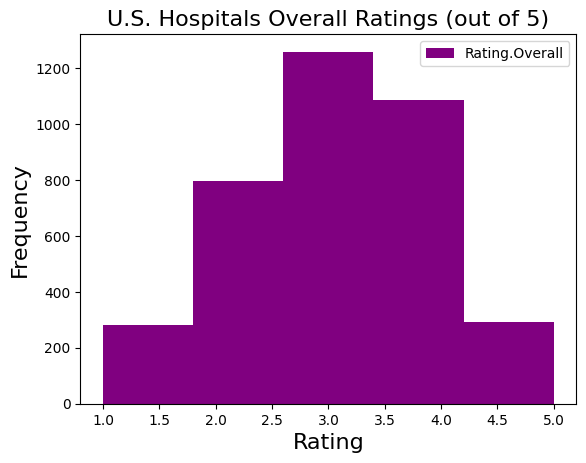

CA Hospital Ratings Mean:  2.864864864864865
CA Hospital Ratings Median:  3.0
CA Hospital Ratings Mode:  0    2
Name: Rating.Overall, dtype: int64


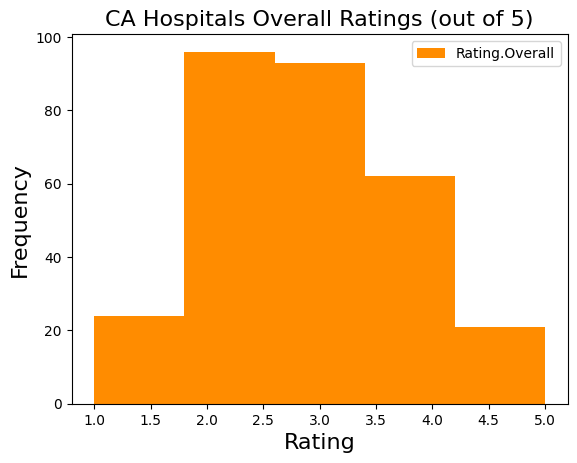

WY Hospital Ratings Mean:  3.3333333333333335
WY Hospital Ratings Median:  3.0
WY Hospital Ratings Mode:  0    3
Name: Rating.Overall, dtype: int64


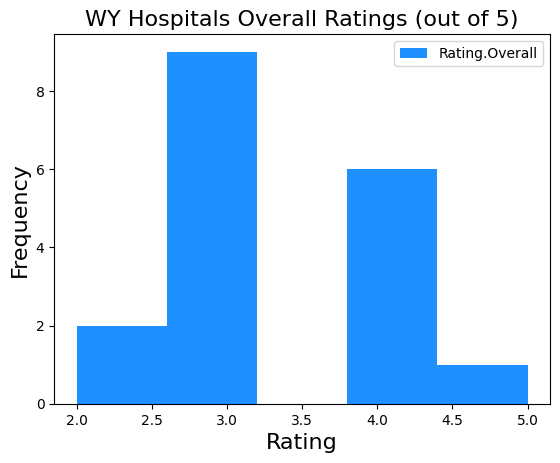

In [20]:
#hospital ratings visualization with null records removed
truncated_hdata = hospital_df.loc[hospital_df['Rating.Overall'] > 0.0]
print('All U.S. Hospital Ratings Mean: ',truncated_hdata['Rating.Overall'].mean())
print('All U.S. Hospital Ratings Median: ',truncated_hdata['Rating.Overall'].median())
print('All U.S. Hospital Ratings Mode: ',truncated_hdata['Rating.Overall'].mode())
truncated_hdata.plot(y = 'Rating.Overall', kind = 'hist', bins = 5, color = 'purple')
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Rating',fontsize=16)
plt.title('U.S. Hospitals Overall Ratings (out of 5)',fontsize=16)
plt.show();

truncated_CArat = CAdf.loc[CAdf['Rating.Overall'] > 0.0]
print('CA Hospital Ratings Mean: ',truncated_CArat['Rating.Overall'].mean())
print('CA Hospital Ratings Median: ',truncated_CArat['Rating.Overall'].median())
print('CA Hospital Ratings Mode: ',truncated_CArat['Rating.Overall'].mode())
truncated_CArat.plot(y = 'Rating.Overall', kind = 'hist', bins = 5, color = 'darkorange')
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Rating',fontsize=16)
plt.title('CA Hospitals Overall Ratings (out of 5)',fontsize=16)
plt.show();

truncated_WYrat = WYdf.loc[WYdf['Rating.Overall'] > 0.0]
print('WY Hospital Ratings Mean: ',truncated_WYrat['Rating.Overall'].mean())
print('WY Hospital Ratings Median: ',truncated_WYrat['Rating.Overall'].median())
print('WY Hospital Ratings Mode: ',truncated_WYrat['Rating.Overall'].mode())
truncated_WYrat.plot(y = 'Rating.Overall', kind = 'hist', bins = 5, color = 'dodgerblue')
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Rating',fontsize=16)
plt.title('WY Hospitals Overall Ratings (out of 5)',fontsize=16)
plt.show();

Wyoming has no ratings of three.

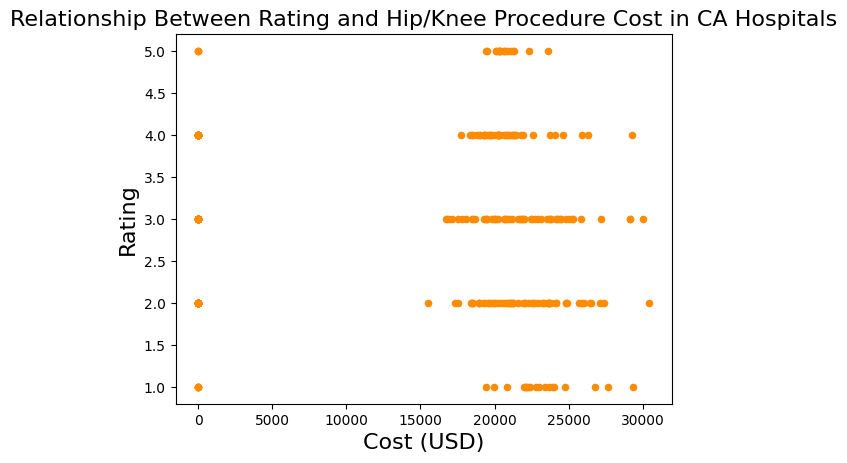

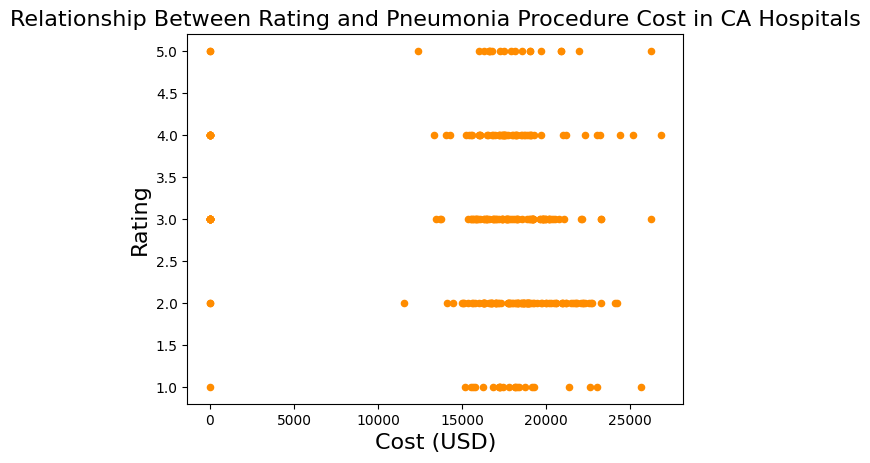

In [18]:
truncated_CArat.plot(y= 'Rating.Overall',x = 'Procedure.Hip Knee.Cost', kind='scatter', color = 'darkorange')
plt.ylabel('Rating',fontsize=16)
plt.xlabel('Cost (USD)',fontsize=16)
plt.title('Relationship Between Rating and Hip/Knee Procedure Cost in CA Hospitals',fontsize=16)
plt.show();

truncated_CArat.plot(y= 'Rating.Overall',x = 'Procedure.Pneumonia.Cost', kind='scatter', color = 'darkorange')
plt.ylabel('Rating',fontsize=16)
plt.xlabel('Cost (USD)',fontsize=16)
plt.title('Relationship Between Rating and Pneumonia Procedure Cost in CA Hospitals',fontsize=16)
plt.show();

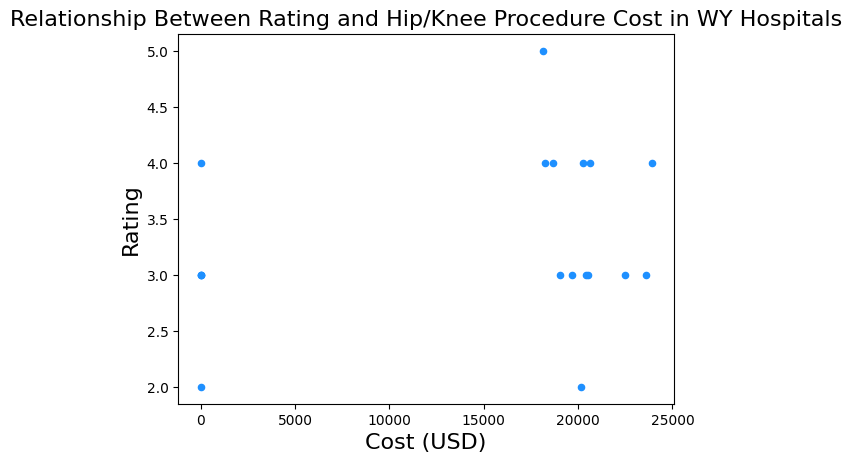

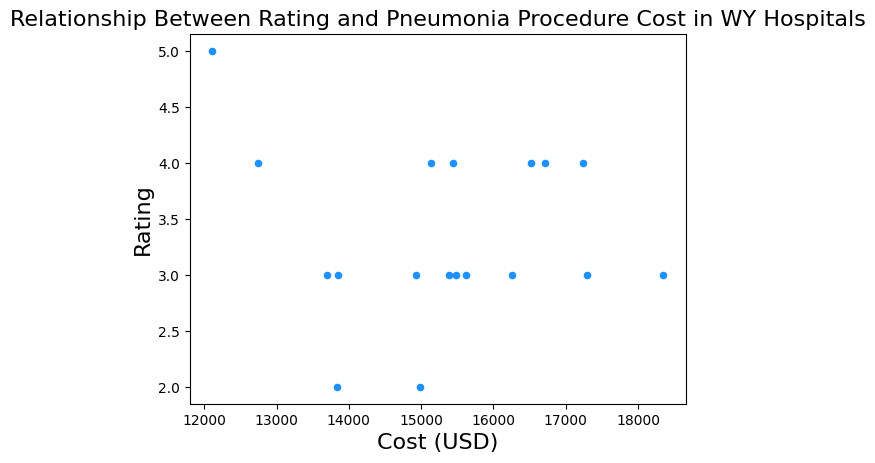

In [19]:
truncated_WYrat.plot(y = 'Rating.Overall',x = 'Procedure.Hip Knee.Cost', kind='scatter', color = 'dodgerblue')
plt.ylabel('Rating',fontsize=16)
plt.xlabel('Cost (USD)',fontsize=16)
plt.title('Relationship Between Rating and Hip/Knee Procedure Cost in WY Hospitals',fontsize=16)
plt.show();

truncated_WYrat.plot(y = 'Rating.Overall',x = 'Procedure.Pneumonia.Cost', kind='scatter', color = 'dodgerblue')
plt.ylabel('Rating',fontsize=16)
plt.xlabel('Cost (USD)',fontsize=16)
plt.title('Relationship Between Rating and Pneumonia Procedure Cost in WY Hospitals',fontsize=16)
plt.show();

It does not appear that there is a correlation between cost and rating of hospitals.

## Methods ##
- connection to research question
- relevant and detailed info on how research was conducted --> make reproducible
- acknowledge limitations of the approach while also asserting why it waas an appropriate choice (rationale)
- potentially cites prior research
- describes statistical tests run
- acknowledges obstacles

In this project, I am assessing patient happiness and the quality of treatment by the rating.

## Results ##
- describe data exploration, findings, visuals

- summarizes and presents findings from data analysis
- bulk of narrative


- healthcare prices extremely different between states
- procedure costs do not appear to differ based on quality of hospital/medical attention

## Discussion ##
- what have we learned from the results?
- what does the analysis show and why is it important?

- California (most populous state)
- Wyoming (least populous state)

greater need in california due to greater population density = higher costs


## Works Cited ##
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3540621/


https://www.gallaghermalpractice.com/blog/post/what-are-the-different-types-of-hospitals